In [19]:
#Импорт базовых пакетов
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
%matplotlib inline
#Таблица под метрики
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Mean Squared Error (MSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [23]:
#Импорт даты
df = pd.read_csv('../content/housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


Мы видим что у нас есть стринговые признаки. Надо их заинкодить.


In [21]:
!pip install category-encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [25]:
encoder = ce.OrdinalEncoder(cols=["Neighborhood"])
df = encoder.fit_transform(df)
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,1,1969,215355.283618
1,2459,3,2,1,1980,195014.221626
2,1860,2,1,2,1970,306891.012076
3,2294,2,1,3,1996,206786.787153
4,2130,5,2,2,2001,272436.239065


In [26]:
#проверим на пустые ячейки
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [27]:
#Общая инфа
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  int64  
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.3 MB


#Создание Линейной регрессии

In [28]:
#Оптимизация train данных и обучение модели
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

#%%capture
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['SquareFeet'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['Price'], dtype=pd.Series)
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
#Оптимизация test данных и проверка
X_test = np.array(test_data['SquareFeet'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['Price'], dtype=pd.Series)
pred = lr.predict(X_test)

In [30]:
# подсчет метрик и их вывод
msesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['SquareFeet']],df['Price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',msesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Price for Test Data: 225280.794
Intercept: 25386.63556530254
Coefficient: [99.37114604]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,50232.808,0.564,-,0.561,-,0.564


##Отрисовка результата

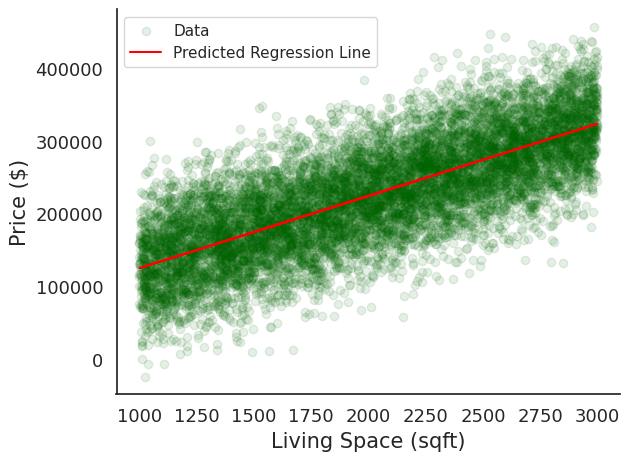

In [31]:
sns.set(style="white", font_scale=1)
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

##Отрисовка даты

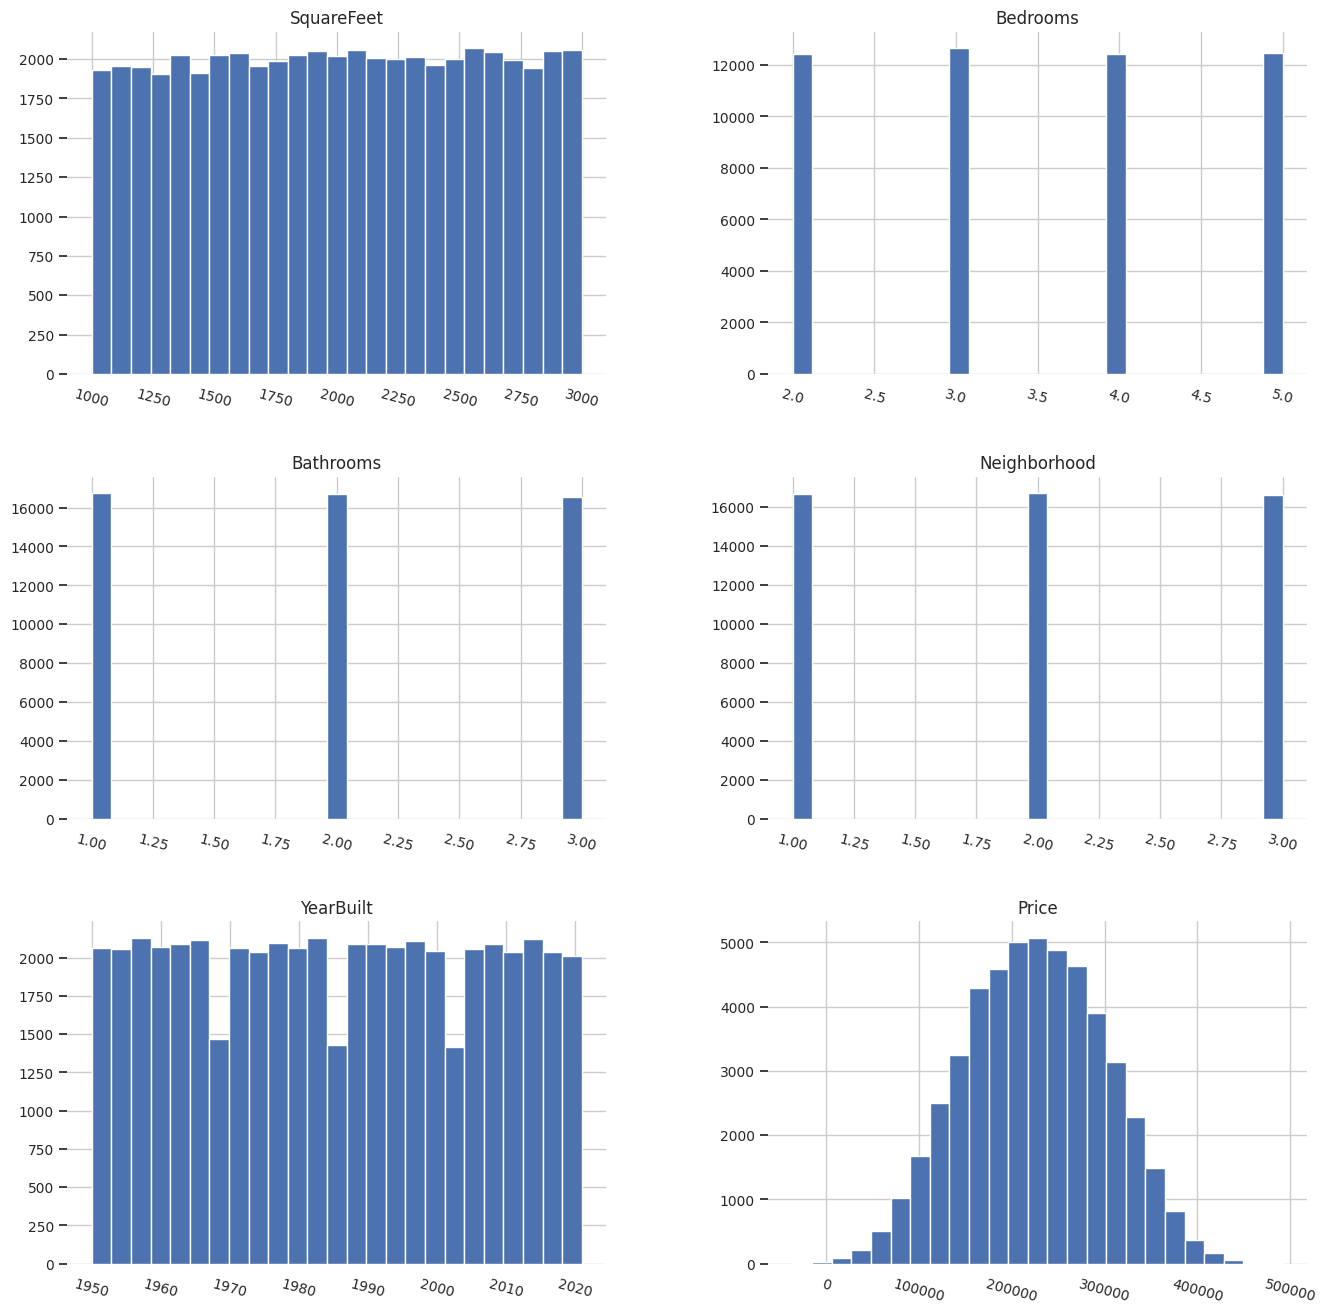

In [32]:
#Обычные графики
h = df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

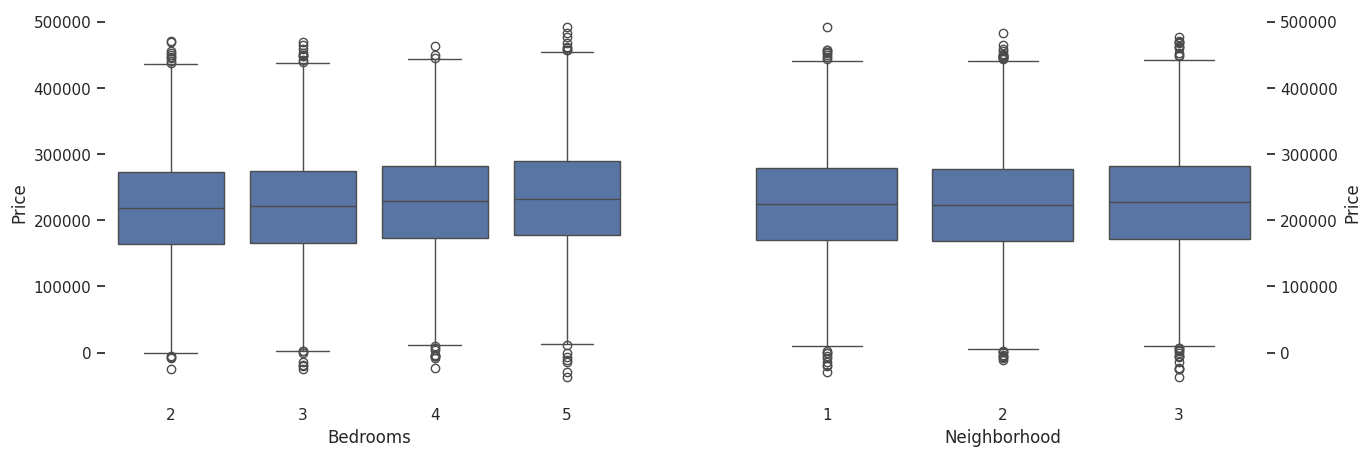

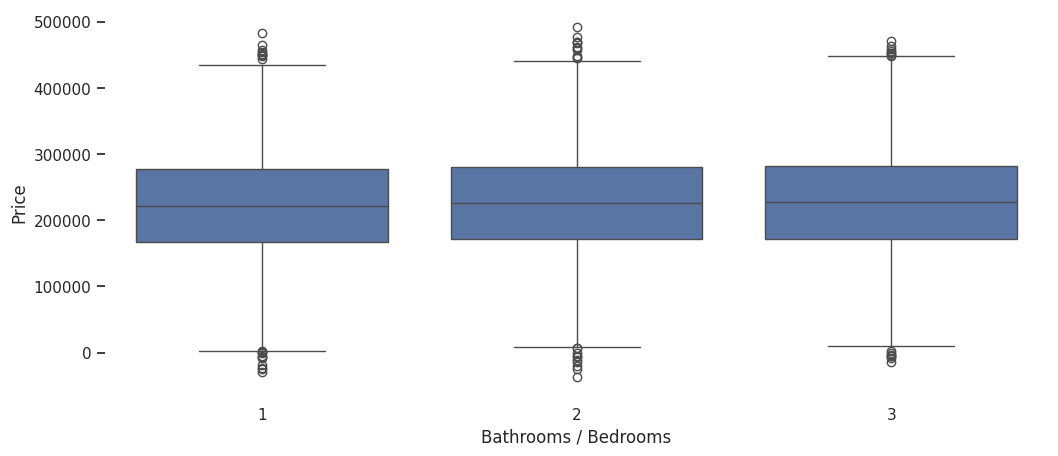

In [34]:
#Свечи по соотношениею ке цене
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['Bedrooms'],y=df['Price'], ax=axes[0])
sns.boxplot(x=df['Neighborhood'],y=df['Price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Neighborhood', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['Bathrooms'],y=df['Price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

Вообще никаких нормальных линейных зависимостей не выявлено. Попробуем 3d визуализацию всего со всем.


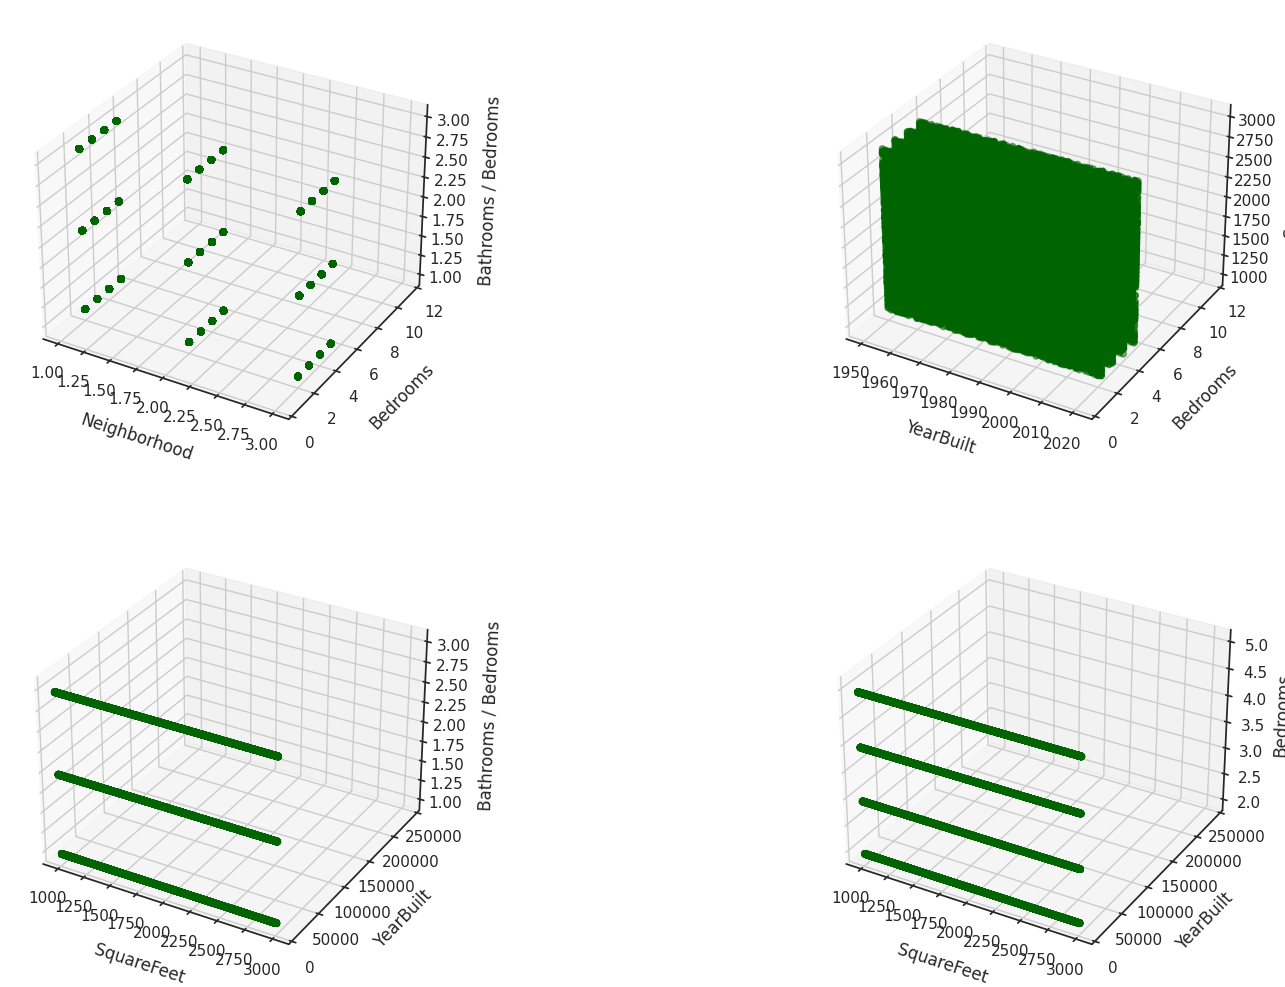

In [36]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['Neighborhood'],df['Bedrooms'],df['Bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nNeighborhood',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['YearBuilt'],df['Bedrooms'],df['SquareFeet'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nYearBuilt',ylabel='\nBedrooms',zlabel='\nSquareFeet')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(df['SquareFeet'],df['YearBuilt'],df['Bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n SquareFeet',ylabel='\n YearBuilt',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['SquareFeet'],df['YearBuilt'],df['Bedrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n SquareFeet',ylabel='\nYearBuilt',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

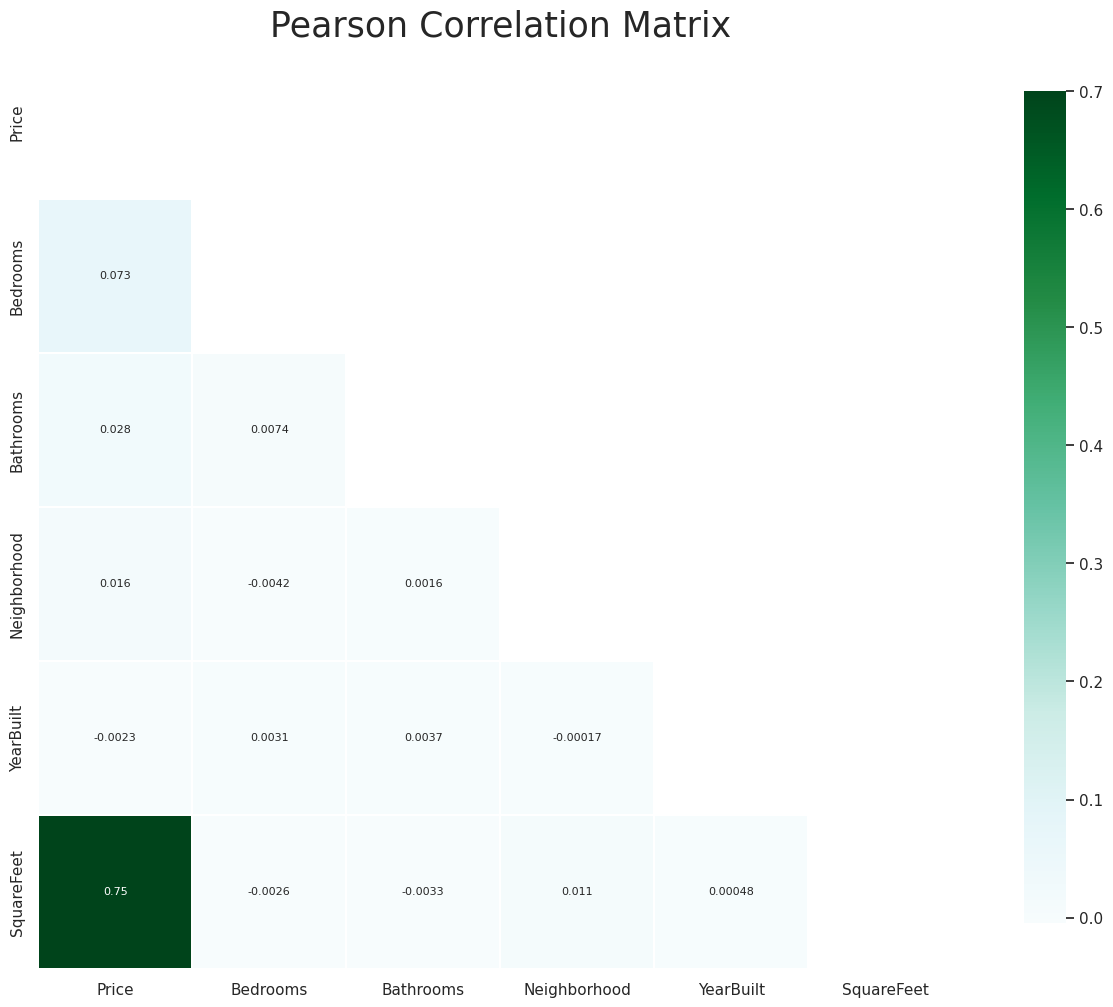

In [39]:
#Посмотрим  карту кореляций
features = ['Price','Bedrooms','Bathrooms','Neighborhood','YearBuilt','SquareFeet']

mask = np.zeros_like(df[features].corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

По итогу явная корреляция только с между ценой и площадью. Как мы предположили раньше. Но попробуем все таки учесть остальные факторы.

#Создание мульти регрессии

##Регрессия 1

In [41]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [42]:
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.8,random_state=3)

features = ['Bedrooms','Bathrooms','SquareFeet','Neighborhood','YearBuilt']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['Price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
msecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df[features],df['Price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',msecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 25203.363172263285
Coefficients: [4950.3387447  3022.2858569    99.39607877  749.33195016  -12.45081841]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,49824.440,0.571,0.571,0.568,0.568,0.570
0,Simple Linear Regression,-,50232.808,0.564,-,0.561,-,0.564


##Ridge Regression

In [43]:
features = ['Bedrooms','Bathrooms','SquareFeet','Neighborhood','YearBuilt']
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['Price'])

pred1 = complex_model_R.predict(test_data_dm[features])
msecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,df[features],df['Price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features],train_data_dm['Price'])

pred2 = complex_model_R.predict(test_data_dm[features])
msecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,df[features],df['Price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data_dm[features],train_data_dm['Price'])

pred3 = complex_model_R.predict(test_data_dm[features])
msecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,df[features],df['Price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',msecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',msecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',msecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,49824.440,0.571,0.571,0.568,0.568,0.570
2,Ridge Regression,"alpha=1, all features",49824.440,0.571,0.571,0.568,0.568,0.570
3,Ridge Regression,"alpha=100, all features",49824.457,0.571,0.571,0.568,0.568,0.570
4,Ridge Regression,"alpha=1000, all features",49824.810,0.571,0.571,0.568,0.568,0.570
0,Simple Linear Regression,-,50232.808,0.564,-,0.561,-,0.564


##Lasso Regression

In [44]:
features = ['Bedrooms','Bathrooms','SquareFeet','Neighborhood','YearBuilt']
complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[features],train_data_dm['Price'])

pred1 = complex_model_L.predict(test_data_dm[features])
msecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,df[features],df['Price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features],train_data_dm['Price'])

pred2 = complex_model_L.predict(test_data_dm[features])
msecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,df[features],df['Price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data_dm[features],train_data_dm['Price'])

pred3 = complex_model_L.predict(test_data_dm[features])
msecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,df[features],df['Price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',msecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',msecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',msecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,49824.440,0.571,0.571,0.568,0.568,0.570
2,Ridge Regression,"alpha=1, all features",49824.440,0.571,0.571,0.568,0.568,0.570
3,Ridge Regression,"alpha=100, all features",49824.457,0.571,0.571,0.568,0.568,0.570
4,Ridge Regression,"alpha=1000, all features",49824.810,0.571,0.571,0.568,0.568,0.570
5,Lasso Regression,"alpha=1, all features",49824.436,0.571,0.571,0.568,0.568,0.570
6,Lasso Regression,"alpha=100, all features",49824.381,0.571,0.571,0.568,0.568,0.570
7,Lasso Regression,"alpha=1000, all features",49845.404,0.570,0.57,0.568,0.568,0.570
0,Simple Linear Regression,-,50232.808,0.564,-,0.561,-,0.564


##Polynomial Regression

In [46]:
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Mean Squared Error (MSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})
features = ['Bedrooms','Bathrooms','SquareFeet','Neighborhood','YearBuilt']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

pred1 = poly.predict(X_testpoly)
msepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['Price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['Price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

pred2 = poly.predict(X_testpoly)
msepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Price'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['Price']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['Price']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['Price'],cv=5).mean(),'.3f'))

features = ['Bedrooms','Bathrooms','SquareFeet','Neighborhood','YearBuilt']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

pred3 = poly.predict(X_testpoly)
msepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Price'],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data['Price']),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data['Price']),'.3f'))
cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

pred4 = poly.predict(X_testpoly)
msepoly4 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Price'],pred4)),'.3f'))
rtrpoly4 = float(format(poly.score(X_trainpoly,train_data['Price']),'.3f'))
rtepoly4 = float(format(poly.score(X_testpoly,test_data['Price']),'.3f'))
cv4 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['Price'],cv=5).mean(),'.3f'))


features = ['Bedrooms','Bathrooms','SquareFeet','Neighborhood','YearBuilt']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['Price'])

pred5 = poly.predict(X_testpoly)
msepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred5)),'.3f'))
rtrpoly5 = float(format(poly.score(X_trainpoly,train_data_dm['Price']),'.3f'))
rtepoly5 = float(format(poly.score(X_testpoly,test_data_dm['Price']),'.3f'))
cv5 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data['Price'])

pred6 = poly.predict(X_testpoly)
msepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred6)),'.3f'))
rtrpoly6 = float(format(poly.score(X_trainpoly,train_data_dm['Price']),'.3f'))
rtepoly6 = float(format(poly.score(X_testpoly,test_data_dm['Price']),'.3f'))
cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_allpoly,df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data['Price'])

pred7 = poly.predict(X_testpoly)
msepoly7 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred7)),'.3f'))
rtrpoly7 = float(format(poly.score(X_trainpoly,train_data_dm['Price']),'.3f'))
rtepoly7 = float(format(poly.score(X_testpoly,test_data_dm['Price']),'.3f'))
cv7 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_allpoly,df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data['Price'])

pred8 = poly.predict(X_testpoly)
msepoly8 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred8)),'.3f'))
rtrpoly8 = float(format(poly.score(X_trainpoly,train_data_dm['Price']),'.3f'))
rtepoly8 = float(format(poly.score(X_testpoly,test_data_dm['Price']),'.3f'))
cv8 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_allpoly,df['Price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data['Price'])

pred9 = poly.predict(X_testpoly)
msepoly9 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['Price'],pred9)),'.3f'))
rtrpoly9 = float(format(poly.score(X_trainpoly,train_data_dm['Price']),'.3f'))
rtepoly9 = float(format(poly.score(X_testpoly,test_data_dm['Price']),'.3f'))
cv9 = float(format(cross_val_score(linear_model.Lasso(alpha=50000),X_allpoly,df['Price'],cv=5).mean(),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',msepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features, no preprocessing',msepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]
evaluation_poly.loc[r+2] = ['Polynomial Regression','degree=2, all features, no preprocessing',msepoly3,rtrpoly3,'-',rtepoly3,'-',cv3]
evaluation_poly.loc[r+3] = ['Polynomial Regression','degree=3, all features, no preprocessing',msepoly4,rtrpoly4,'-',rtepoly4,'-',cv4]
evaluation_poly.loc[r+4] = ['Polynomial Regression','degree=2, all features',msepoly5,rtrpoly5,'-',rtepoly5,'-',cv5]
evaluation_poly.loc[r+5] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',msepoly6,rtrpoly6,'-',rtepoly6,'-',cv6]
evaluation_poly.loc[r+6] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',msepoly7,rtrpoly7,'-',rtepoly7,'-',cv7]
evaluation_poly.loc[r+7] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',msepoly8,rtrpoly8,'-',rtepoly8,'-',cv8]
evaluation_poly.loc[r+8] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',msepoly9,rtrpoly9,'-',rtepoly9,'-',cv9]
evaluation_poly_temp = evaluation_poly[['Model','Details','Mean Squared Error (MSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.09851e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.10464e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.09617e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.11165e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

,Model,Details,Mean Squared Error (MSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Polynomial Regression,"degree=2, selected features, no preprocessing",49825.706,0.571,0.568,0.57
1,Polynomial Regression,"degree=3, selected features, no preprocessing",49829.953,0.571,0.568,0.57
2,Polynomial Regression,"degree=2, all features, no preprocessing",49825.706,0.571,0.568,0.57
3,Polynomial Regression,"degree=3, all features, no preprocessing",49829.953,0.571,0.568,0.57
4,Polynomial Regression,"degree=2, all features",49825.706,0.571,0.568,0.57
5,Polynomial Ridge Regression,"alpha=1, degree=2, all features",49824.497,0.571,0.568,0.57
6,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",49824.590,0.571,0.568,0.57
7,Polynomial Lasso Regression,"alpha=1, degree=2, all features",49820.863,0.571,0.568,0.57
8,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",49828.494,0.571,0.568,0.57


##k-NN Regression

In [49]:
features = ['Bedrooms','Bathrooms','SquareFeet','Neighborhood','YearBuilt']
knnreg = KNeighborsRegressor(n_neighbors=2)
knnreg.fit(train_data_dm[features],train_data_dm['Price'])
pred = knnreg.predict(test_data_dm[features])

mseknn1 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn1 = float(format(knnreg.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrknn1 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn1 = float(format(knnreg.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
arteknn1 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(knnreg,df[features],df['Price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=3)
knnreg.fit(train_data_dm[features],train_data_dm['Price'])
pred = knnreg.predict(test_data_dm[features])

mseknn2 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn2 = float(format(knnreg.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrknn2 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn2 = float(format(knnreg.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
arteknn2 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(knnreg,df[features],df['Price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=5)
knnreg.fit(train_data_dm[features],train_data_dm['Price'])
pred = knnreg.predict(test_data_dm[features])

mseknn3 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn3 = float(format(knnreg.score(train_data_dm[features],train_data_dm['Price']),'.3f'))
artrknn3 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['Price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn3 = float(format(knnreg.score(test_data_dm[features],test_data_dm['Price']),'.3f'))
arteknn3 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['Price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(knnreg,df[features],df['Price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression','k=2, all features',mseknn1,rtrknn1,artrknn1,rteknn1,arteknn1,cv1]
evaluation.loc[r+1] = ['KNN Regression','k=5, all features',mseknn2,rtrknn2,artrknn2,rteknn2,arteknn2,cv2]
evaluation.loc[r+2] = ['KNN Regression','k=3, all features',mseknn3,rtrknn3,artrknn3,rteknn3,arteknn3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,49824.440,0.571,0.571,0.568,0.568,0.570
2,Ridge Regression,"alpha=1, all features",49824.440,0.571,0.571,0.568,0.568,0.570
3,Ridge Regression,"alpha=100, all features",49824.457,0.571,0.571,0.568,0.568,0.570
4,Ridge Regression,"alpha=1000, all features",49824.810,0.571,0.571,0.568,0.568,0.570
5,Lasso Regression,"alpha=1, all features",49824.436,0.571,0.571,0.568,0.568,0.570
6,Lasso Regression,"alpha=100, all features",49824.381,0.571,0.571,0.568,0.568,0.570
7,Lasso Regression,"alpha=1000, all features",49845.404,0.570,0.57,0.568,0.568,0.570
0,Simple Linear Regression,-,50232.808,0.564,-,0.561,-,0.564
10,KNN Regression,"k=27, all features",51236.319,0.582,0.582,0.543,0.543,0.549
9,KNN Regression,"k=25, all features",51287.865,0.584,0.583,0.542,0.542,0.547
